<a href="https://colab.research.google.com/github/GZabalaG/AIMaster/blob/main/Supervised/Prueba_final_Gonzalo_zabala_Garc%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRUEBA FINAL

In [279]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Información general:
* La entrega consistirá en un archivo .ipynb siguiendo las instrucciones de este notebook.
* Peso en la asignatura: 40% de la nota final.
* Fecha de vencimiento: 22/07/2021, a las 23:59h (hora peninsular). 

**Instrucciones para cumplimentar el notebook:**
* Descargar este notebook, que servirá como base para la entrega.
* **No hay que modificar las celdas** que vienen en la hoja de actividades. Para contestar a las preguntas, se deben añadir celdas inmediatamente después de cada pregunta.
* Para la nota se valorará tanto la consecución de la respuesta adecuada como el estilo y adecuación del código fuente, así como la inclusión de comentarios apropiados.
* **No está permitido compartir los resultados de una actividad** con l@s compañer@s. Hacerlo puede suponer suspender la asignatura y enfrentarse a medidas disciplinarias.

### Ejercicio 1 (2 puntos)
Utilizar el conjunto de datos "dataset_1.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 1.a) Imputación de valores ausentes (1 punto)

Consideraciones:
- En aquellas instancias (filas) que contengan UN ÚNICO VALOR NaN en alguno de sus atributos (columnas), se imputará dicho valor.
 * Si el atributo corresponde a una variable discreta, se imputará el valor utilizando la moda de dicho atributo. 
 * Si el atributo corresponde a una variable continua, se imputará el valor utilizando la media de dicho atributo. 
- Aquellas instancias (filas) que contengan MÁS DE UN VALOR NaN en sus atributos, deberán ser eliminadas por completo. 

Los outputs deberán ser: 
- Una matriz X de dimensiones M x N, donde M será el número de instancias y N, el de atributos.
- Un vector y de dimensiones M. 

##### Carga de datos

In [280]:
import numpy as np

data = np.load('/content/drive/MyDrive/Master IA/Aprendizaje Supervisado/actividal_final/dataset_1.npy')

print(data)

[[ 0.          4.          1.         ...  8.2603626   7.37490176
   0.        ]
 [ 0.          4.          0.         ... 10.9370737  10.30131004
   0.        ]
 [ 0.          3.          1.         ... 10.69134847 11.45671439
   0.        ]
 ...
 [ 0.          2.          0.         ...  1.94458971  8.88390924
   0.        ]
 [ 0.          3.          2.         ...  1.92895933  9.03304966
   1.        ]
 [ 0.          4.          0.         ...  2.0478487   8.86096477
   0.        ]]


##### Información sobre el dataset

In [281]:
print('Shape:', data.shape)

print('\n--------------\n')

print('Clases:', np.unique(data[:,-1]))

print('\n--------------\n')
print('Continuos | Categorical columns:\n')

i = 0
cat_cols = []
con_cols = []
for column in data.T:
  count_values = len(np.unique(column))
  rate = count_values / data.shape[0]

  if rate < 0.1:
    value_type = 'Categorical'  
    cat_cols.append(i)
  else :
    value_type = 'Continuous'
    con_cols.append(i)


  print('Column:', i, '| Unique values:', count_values, '|', value_type)
  i+=1

print('\n--------------\n')
print('Missing values:\n')

i = 0
for column in data.T:
  print('Column:', i, ' | Missing values', np.count_nonzero(np.isnan(column)))
  i+=1

Shape: (500, 9)

--------------

Clases: [0. 1.]

--------------

Continuos | Categorical columns:

Column: 0 | Unique values: 8 | Categorical
Column: 1 | Unique values: 10 | Categorical
Column: 2 | Unique values: 12 | Categorical
Column: 3 | Unique values: 13 | Categorical
Column: 4 | Unique values: 12 | Categorical
Column: 5 | Unique values: 500 | Continuous
Column: 6 | Unique values: 500 | Continuous
Column: 7 | Unique values: 377 | Continuous
Column: 8 | Unique values: 2 | Categorical

--------------

Missing values:

Column: 0  | Missing values 6
Column: 1  | Missing values 5
Column: 2  | Missing values 5
Column: 3  | Missing values 5
Column: 4  | Missing values 5
Column: 5  | Missing values 7
Column: 6  | Missing values 5
Column: 7  | Missing values 5
Column: 8  | Missing values 0


##### Drop and filling missing values

In [282]:
import pandas as pd

df = pd.DataFrame(data=data)

display(df)

,0,1,2,3,4,5,6,7,8
0,0.0,4.0,1.0,4.0,2.0,9.044810,8.260363,7.374902,0.0
1,0.0,4.0,0.0,6.0,1.0,8.569082,10.937074,10.301310,0.0
2,0.0,3.0,1.0,1.0,5.0,9.687778,10.691348,11.456714,0.0
3,0.0,2.0,1.0,5.0,1.0,12.057221,10.286357,10.575028,0.0
4,0.0,2.0,2.0,3.0,2.0,9.732969,9.447140,9.383029,0.0
...,...,...,...,...,...,...,...,...,...
495,0.0,1.0,0.0,3.0,4.0,3.114222,1.903256,8.995061,0.0
496,1.0,1.0,2.0,4.0,1.0,3.032017,2.305869,9.185725,1.0
497,0.0,2.0,0.0,4.0,3.0,2.958827,1.944590,8.883909,0.0
498,0.0,3.0,2.0,5.0,0.0,2.955424,1.928959,9.033050,1.0


In [283]:
# Rows with more than NaNs value
df1 = df[df.isna().any(axis=1)]
display(df1)

,0,1,2,3,4,5,6,7,8
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15,NaN,3.0,1.0,3.0,3.0,10.238116,12.849551,11.015530,0.0
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
208,0.0,3.0,2.0,2.0,3.0,NaN,10.940930,11.175542,0.0
320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
352,0.0,3.0,2.0,5.0,0.0,NaN,13.752695,10.000000,1.0
410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [284]:
# Drop rows with more than 1 NaN
df = df[df.isnull().sum(axis=1) < 2]

df1 = df[df.isna().any(axis=1)]
display(df1)

,0,1,2,3,4,5,6,7,8
15,NaN,3.0,1.0,3.0,3.0,10.238116,12.849551,11.015530,0.0
208,0.0,3.0,2.0,2.0,3.0,NaN,10.940930,11.175542,0.0
352,0.0,3.0,2.0,5.0,0.0,NaN,13.752695,10.000000,1.0


In [285]:
# Fill continuous NaN values
from sklearn.impute import SimpleImputer

# Columnas de atributos continuos
df_cons = df.iloc[:,con_cols]

# Limpieza de datos: imputación valores ausentes (modelo).
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_cons)

# Limpieza de datos: imputación valores ausentes (aplicación).
df.iloc[:,con_cols] = imp.transform(df.iloc[:,con_cols])

df1 = df[df.isna().any(axis=1)]
display('Continuous filled:',df1)

'Continuous filled:'

,0,1,2,3,4,5,6,7,8
15,NaN,3.0,1.0,3.0,3.0,10.238116,12.849551,11.01553,0.0


In [286]:
# Fill categorical NaN values
df.iloc[:,cat_cols] = df.iloc[:,cat_cols].fillna(df.mode()[0])

# Columnas de atributos continuos
df_cat = df.iloc[:,cat_cols]

# Limpieza de datos: imputación valores ausentes (modelo).
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df_cat)

# Limpieza de datos: imputación valores ausentes (aplicación).
df.iloc[:,cat_cols] = imp.transform(df.iloc[:,cat_cols])

df1 = df[df.isna().any(axis=1)]
display('Categorical filled:',df1)

'Categorical filled:'

,0,1,2,3,4,5,6,7,8


Work done

In [287]:
print('NaNs:\n', df.isna().sum())
print('\nShape:',df.shape)

X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()
print('\n\n------\n\n')
print('X=\n', X)
print('\n\n------\n\n')
print('y=\n',y)

NaNs:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

Shape: (495, 9)


------


X=
 [[ 0.          4.          1.         ...  9.04481012  8.2603626
   7.37490176]
 [ 0.          4.          0.         ...  8.56908202 10.9370737
  10.30131004]
 [ 0.          3.          1.         ...  9.68777842 10.69134847
  11.45671439]
 ...
 [ 0.          2.          0.         ...  2.95882711  1.94458971
   8.88390924]
 [ 0.          3.          2.         ...  2.95542398  1.92895933
   9.03304966]
 [ 0.          4.          0.         ...  2.94928374  2.0478487
   8.86096477]]


------


y=
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 

#### 1.b) Eliminación de valores outliers EXTREMOS (1 punto)
- Aplicar el método de Elliptic Envelope fijando una semilla en 42
- Utilizar el diagrama de caja y bigotes para establecer los umbrales de decisión
- Plotear el diagrama obtenido a partir de las puntuaciones calculadas con el método Elliptic Envelope
- Eliminar las instancias que contengan valores outliers extremos

Los outputs deberán ser: 
- Una matriz X de dimensiones M' x N, donde M' será el nuevo número de instancias y N, el de atributos.
- Un vector y de dimensiones M'. 

##### Obtención de outliers y plot de las puntuaciones sobre la clase

In [288]:
from sklearn.covariance import EllipticEnvelope
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
sns.set_theme(style="whitegrid")

outlier_method = EllipticEnvelope(random_state=42).fit(X)
scores_pred = outlier_method.decision_function(X)
#threshold = stats.scoreatpercentile(scores_pred, 25)

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-36.747754155524625 > -38.959386557666875). You may want to try with a higher value of support_fraction (current value: 0.509).
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-36.903632764895178 > -37.111340628367792). You may want to try with a higher value of support_fraction (current value: 0.509).
  RuntimeWarning)


In [289]:
Q1 = stats.scoreatpercentile(scores_pred, 25)
Q3 = stats.scoreatpercentile(scores_pred, 75)
RIC = Q3 - Q1
li = Q1 - 1.5*RIC # 1,5: valores outliers atípicos
ls = Q3 + 1.5*RIC # 1,5: valores outliers atípicos

print('Q1:', Q1, 'Q3:', Q3, 'RIC:', RIC)

print('limite inferior: ', li)
print('limite superior: ', ls)

Q1: 77.16043836982965 Q3: 106.0677959192163 RIC: 28.907357549386646
limite inferior:  33.79940204574968
limite superior:  149.42883224329626


In [290]:
# Estimación de outliers
pos_i = np.where(scores_pred<li)
pos_s = np.where(scores_pred>ls)

print('Posición de outliers atípicos en el extremno inferior: ', pos_i)
print('Posición de outliers atípicos en el extremno superior: ', pos_s)

Posición de outliers atípicos en el extremno inferior:  (array([371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383,
       384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396,
       397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409,
       410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422,
       423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435,
       436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
       449, 450, 451, 452, 453, 454]),)
Posición de outliers atípicos en el extremno superior:  (array([], dtype=int64),)


In [291]:
# Matriz de outliers
mask_outliers = np.ones(np.shape(scores_pred))
mask_outliers[pos_i] = 0
mask_outliers[pos_s] = 0
print(mask_outliers)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

Creamos un dataframe al que le añadimos la clase junto a su valor de outlier para comparar los valores y 'plotear' los valores de Elliptic Envelope

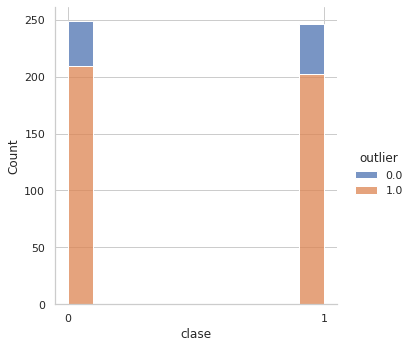

In [292]:
outlier_df = pd.DataFrame({'outlier':mask_outliers, 'clase':y})

g = sns.displot(data=outlier_df, x="clase", hue="outlier", multiple="stack")

g.set(xticks=[0,1])

##### Cálculo de valores outliers EXTREMOS

In [293]:
Q1 = stats.scoreatpercentile(scores_pred, 25)
Q3 = stats.scoreatpercentile(scores_pred, 75)
RIC = Q3 - Q1
li = Q1 - 3*RIC # 3: outlier extremo
ls = Q3 + 3*RIC # 3: outlier extremo

print('Q1:', Q1, '\nQ3', Q3, '\nRIC:', RIC)

print('limite inferior: ', li)
print('limite superior: ', ls)

Q1: 77.16043836982965 
Q3 106.0677959192163 
RIC: 28.907357549386646
limite inferior:  -9.561634278330288
limite superior:  192.78986856737623


In [294]:
# Estimación de outliers y eliminación
pos_i = np.where(scores_pred<li)
pos_s = np.where(scores_pred>ls)

print('Posición de outliers extremos en el extremno inferior: ', pos_i)
print('Posición de outliers extremos en el extremno superior: ', pos_s)

Posición de outliers extremos en el extremno inferior:  (array([417, 423, 449]),)
Posición de outliers extremos en el extremno superior:  (array([], dtype=int64),)


Eliminación de los outlier extremos

In [295]:
X.shape

(495, 8)

In [296]:
X = np.delete(X, pos_i, axis = 0)

In [297]:
X.shape

(492, 8)

##### Boxplot de los valores outliers

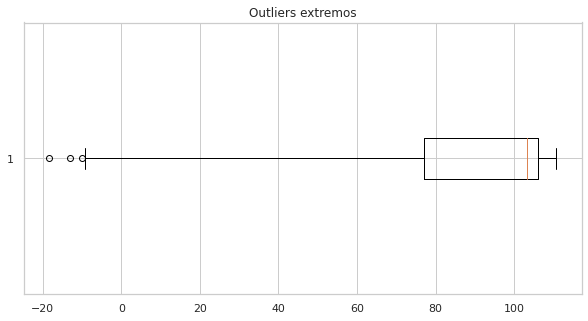

In [298]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize = (10, 5))
ax.set_title('Outliers extremos')
ax.boxplot(scores_pred, vert=False, whis = 3)

plt.show()

### Ejercicio 2 (1.5 puntos)
Utilizar el conjunto de datos "dataset_2.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 2.a) Partición de datos externa (0.5 puntos)
Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42). 

##### Carga de datos

In [299]:
import numpy as np

data = np.load('/content/drive/MyDrive/Master IA/Aprendizaje Supervisado/actividal_final/dataset_2.npy')
X = data[:, 0:-1]
y = data[:, -1]
print(X.shape)
print(y.shape)

(492, 8)
(492,)


##### Partición hold-out

In [300]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(393, 8)
(99, 8)
(393,)
(99,)


#### 2.b) Selección de atributos sobre el conjunto de entrenamiento (0.5 puntos)
Aplicar el método de VarianceThreshold con un umbral de 0.2 en el conjunto de entrenamiento

In [301]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold = .2)

X_train = sel.fit_transform(X_train)
print(X_train.shape)

(393, 7)


Ha sido eliminado un atributo del conjunto de entrenamiento

#### 2.c) Estandarización de los datos de entrenamiento (0.5 puntos)
Utilizar el método StandardScaler

In [302]:
from sklearn import preprocessing

standardizer = preprocessing.StandardScaler()

X_train = standardizer.fit_transform(X_train)

print(X_train)

[[-0.41701989 -0.37232487 -0.42469918 ... -0.54017298 -1.96779643
  -2.17643457]
 [-0.41701989 -1.25913502  0.31710872 ...  0.33529217  0.47045818
   0.57704227]
 [ 0.63354944 -0.37232487 -1.16650709 ... -2.29090328 -0.78155436
  -2.19168937]
 ...
 [ 0.63354944  0.51448528  1.05891663 ... -0.05463725  1.59610944
   0.46205349]
 [ 0.63354944 -0.37232487  1.05891663 ... -2.27896303 -0.74796736
  -2.20956336]
 [-0.41701989 -1.25913502  1.05891663 ...  0.21936805  0.56915869
  -0.02527913]]


### Ejercicio 3 (2 puntos)
Se requieren los resultados del ejercicio anterior

#### 3.a) Comparación de modelos de clasifición mediante validación cruzada (0.5 puntos)
Aplicar una validación cruzada interna de K=5 bolsas para optimizar y comparar la capacidad predictiva de los siguientes modelos: Regresión logística, Árboles de decisión y Support vector machine. (Fijar en todos una semilla en 42). La comparación debe realizarse en términos de exactitud proporcionando resultados de media +- desviación estándar.

#### 3.b) Evaluación de los modelos sobre el conjunto de test (1.5 puntos)
- Entrenar los modelos anteriores utilizando todos los datos de entrenamiento y evaluar su rendimiento sobre el conjunto de test.
- Mostrar en una figura la comparación de las curvas ROC obtenidas para cada modelo.
- Crear una tabla donde se muestren los resultados de todos los modelos.
 * Las filas serán: Precisión, Sensibilidad, F-score, Exactitud y AUC
 * Las columnas serán: LR, Tree y SVM 

### Ejercicio 4 (2 puntos)
Utilizar el conjunto de datos "fish_dataset" para resolver el ejercicio

#### 4.a) Procesado de imagen previo a la extracción de características (1 punto)
Crear una función llamada "cropping_function" donde: 
- Los inputs sean la imagen RGB de un pez y su máscara correspondiente.
- El output sea el crop de la bounding box de la imagen original orientada en el eje horizontal.

Para ello, se pide:
- Calcular la orientación del objeto a caracterizar.
- Hacer una conversión siguiendo la siguiente fórmula:
 * angle = (orientation*90)/(math.pi/2), utiliza "import math"
   -  Si 'angle' es mayor que 0, la orientación será igual a 90-angle
   -  Si no, la orientación será igual a -(90+angle)
- Aplicar una transformación geométrica de rotación para orientar horizontalmente el objeto de interés.
- Hacer un crop de la boundingbox de la imagen original RGB, que será el output de la función

#### 4.b) Extracción de características de textura basadas en el descriptor Local Binary Pattern (1 punto)
Crear un bucle for en el que:
 - Se lean las imágenes RGB y sus máscaras
 - Se extraiga el crop de la imagen RGB horizontal llamando a la función creada en el apartado anterior
 - Se obtenga la imagen LBP
 - Se muestre un subplot con el crop de la imagen RGB horizontal y su imagen LBP
 - Se calcule el histograma relativo a las características LBP. 

Plotear en una figura los 3 histogramas LBP obtenidos para analizar visualmente las diferencias en función del tipo de pez.

### Ejercicio 5 (2.5 puntos)

Crear un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, RMSE y MAPE aplicando los regresores OLS y KNN en al menos tres datasets de regresión (a elegir los que se deseen). Se debe llevar a cabo una partición externa de tipo hold-out y una validación cruzada interna con K=10 bolsas.